#Sketches to image generation using GANs

### Steps:

**1.Data Collection**

**2.Defining Paths**

**3.Data Preprocessing**

**4.Defining 3 key Models:**

  Generator

  Discriminator

  Combined

**5.Setting up losses and optimizers**

**6.Training the model**

**7.Testing the trained model **



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Bringing the data in and Setting up the paths

In [ ]:
# Define paths to directories containing train and test photos and sketches
path_to_train_photos = '/content/gdrive/MyDrive/Dataset/train/train_photo/'
path_to_test_photos = '/content/gdrive/MyDrive/Dataset/test/test_photo/'
path_to_train_sketches = '/content/gdrive/MyDrive/Dataset/train/train_sketch/'
path_to_test_sketches = '/content/gdrive/MyDrive/Dataset/test/test_sketch/'

# Import the os module for directory operations
import os

# Create lists containing file paths for train photos and train sketches
train_photos = [path_to_train_photos + i for i in os.listdir(path_to_train_photos)]
train_sketches = [path_to_train_sketches + i for i in os.listdir(path_to_train_sketches)]

# Create lists containing file paths for test photos and test sketches
test_photos = [path_to_test_photos + i for i in os.listdir(path_to_test_photos)]
test_sketches = [path_to_test_sketches + i for i in os.listdir(path_to_test_sketches)]

# Combine train and test photos into a single list
photos = train_photos + test_photos

# Combine train and test sketches into a single list
sketches = train_sketches + test_sketches


## Processing the images and Creating array of The sketches and photos

In [ ]:
import keras
from keras.utils import load_img, img_to_array
import numpy as np

# Initialize empty lists to store arrays of sketches and photos
sketches_array = []
photos_array = []

# Loop through the list of photo file paths
for i in range(len(photos)):
    # Load sketch image and convert it to array
    sketch_path = sketches[i]
    loaded_sketch = load_img(sketch_path, target_size=(128, 128, 3))
    loaded_sketch = img_to_array(loaded_sketch)
    sketches_array.append(loaded_sketch)

    # Load photo image and convert it to array
    photo_path = photos[i]
    loaded_photo = load_img(photo_path, target_size=(128, 128, 3))
    loaded_photo = img_to_array(loaded_photo)
    photos_array.append(loaded_photo)

# Convert lists of arrays into numpy arrays
sketches_array = np.array(sketches_array)
photos_array = np.array(photos_array)

# Convert arrays to float32 type
sketches_array = sketches_array.astype('float32')
photos_array = photos_array.astype('float32')

# Normalize pixel values to the range [-1, 1]
sketches_array = (sketches_array.astype(np.float32) - 127.5) / 127.5
photos_array = (photos_array.astype(np.float32) - 127.5) / 127.5


## Building the Generator Which will Generate images from noise

In [ ]:
#Edited Generator for 128*128

from keras.layers import Input, Conv2D, Activation, Conv2DTranspose, BatchNormalization
from keras.models import Model
import tensorflow as tf

def generator():
    input_layer = Input((128, 128, 3))

    # Downsample layers
    conv1_layer = Conv2D(32, (7, 7), strides=(1, 1), padding='same')(input_layer)
    conv1_layer = BatchNormalization()(conv1_layer)
    conv1_layer = Activation('relu')(conv1_layer)

    conv2_layer = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(conv1_layer)
    conv2_layer = BatchNormalization()(conv2_layer)
    conv2_layer = Activation('relu')(conv2_layer)

    conv3_layer = Conv2D(128, (3, 3), strides=(2, 2), padding="same")(conv2_layer)
    conv3_layer = BatchNormalization()(conv3_layer)
    conv3_layer = Activation('relu')(conv3_layer)

    # Residual blocks
    b1=Conv2D(128,(3,3),padding="same")(conv3_layer)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block1 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block1)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block2 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block2)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block3 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block3)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block4 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block4)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block5 = tf.keras.layers.add([b1,b2])

    b1=Conv2D(128,(3,3),padding="same")(block5)
    b1=BatchNormalization()(b1)
    b1=Activation('relu')(b1)

    b2=Conv2D(128,(3,3),padding="same")(b1)
    b2=BatchNormalization()(b2)
    b2=Activation('relu')(b2)

    block6 = tf.keras.layers.add([b1,b2])
    #b = conv3_layer
    #for _ in range(6):
     #   b1 = Conv2D(128, (3, 3), padding="same")(b)
     #   b1 = BatchNormalization()(b1)
      #  b1 = Activation('relu')(b1)

      #  b2 = Conv2D(128, (3, 3), padding="same")(b1)
      #  b2 = BatchNormalization()(b2)
      #  b = Activation('relu')(b2)

    # Upsample layers
    transpose1 = Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same')(block6)
    transpose1 = BatchNormalization()(transpose1)
    transpose1 = Activation('relu')(transpose1)

    transpose2 = Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same')(transpose1)
    transpose2 = BatchNormalization()(transpose2)
    transpose2 = Activation('relu')(transpose2)

    # Output layer
    output_layer = Conv2D(3, (3, 3), strides=(1, 1), padding='same', activation='relu')(transpose2)

    return Model(inputs=[input_layer], outputs=[output_layer])

# Create the generator model
generator_model = generator()

# Display model summary

generator_model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 32)         4736      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 32)         0         ['batch_normalization[0][0

In [ ]:
from keras.layers import Input, Conv2D, Activation, BatchNormalization, Flatten, Dense, LeakyReLU
from keras.models import Model

def discriminator():
    # Define input layer
    input_layer = Input((128, 128, 3))

    # First convolutional layer
    conv1_layer = Conv2D(64, (4, 4), strides=(2, 2))(input_layer)
    conv1_layer = Activation(LeakyReLU(alpha=0.2))(conv1_layer)

    # Second convolutional layer
    conv2_layer = Conv2D(128, (4, 4), strides=(2, 2))(conv1_layer)
    conv2_layer = BatchNormalization()(conv2_layer)
    conv2_layer = Activation(LeakyReLU(alpha=0.2))(conv2_layer)

    # Third convolutional layer
    conv3_layer = Conv2D(256, (4, 4), strides=(2, 2))(conv2_layer)
    conv3_layer = BatchNormalization()(conv3_layer)
    conv3_layer = Activation(LeakyReLU(alpha=0.2))(conv3_layer)

    # Fourth convolutional layer
    conv4_layer = Conv2D(256, (4, 4), strides=(2, 2))(conv3_layer)
    conv4_layer = BatchNormalization()(conv4_layer)
    conv4_layer = Activation(LeakyReLU(alpha=0.2))(conv4_layer)

    # Flatten layer
    output_layer = Flatten()(conv4_layer)

    # Output layer (dense layer with sigmoid activation)
    output_layer = Dense(1, activation='sigmoid')(output_layer)

    return Model(inputs=[input_layer], outputs=[output_layer])


In [ ]:
discriminator_model=discriminator()
discriminator_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 63, 63, 64)        3136      
                                                                 
 activation_17 (Activation)  (None, 63, 63, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 30, 30, 128)       131200    
                                                                 
 batch_normalization_17 (Ba  (None, 30, 30, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_18 (Activation)  (None, 30, 30, 128)       0         
                                                           

Let's break down the combined model:

**Input Layer**:
This is the input layer for the combined model. It takes as input images with dimensions (64, 64, 3). These are the images that will be fed into the generator.

**Generator**:
The generator takes input from the input layer and produces generated images. These images are created with the intention of being realistic enough to fool the discriminator.
In the combined model, the output of the generator is obtained by passing the input through the network of the generator.

**Resampling**:
The generator creates images with dimensions (64, 64, 3) (same as the input layer). However, the discriminator expects images with dimensions (128, 128, 3).
Therefore, the output of the generator is resampled by UpSampling2D to match the dimensions expected by the discriminator. This operation doubles the spatial dimensions of the input.

**Freeze discriminator weight**s:
Before passing the resampled generator outputs through the discriminator, the discriminator weights are frozen. This means that only the generator weights will be updated and the discriminator weights will remain unchanged during training of the combined model.

**Discriminator**:
The discriminator takes the outputs of the resampled generator as input and makes predictions about whether these images are real or fake.
In the combined model, the discriminator output is obtained by passing the resampled generator outputs through the discriminator network.

**Combined model**:
The combined model takes input images and produces two

outputs
Generated images from the generator.
Predictions from the discriminator about the generated images.
By training the combined model, the generator learns to generate more realistic images that can better fool the discriminator, while the discriminator learns to better distinguish between real and generated images.

In [ ]:
from keras.layers import UpSampling2D

def combined_model(generator, discriminator):

    input_layer = Input((64, 64, 3))

    # Generate images using the generator
    generator_outputs = generator(input_layer)

    # Upsample generator outputs to match discriminator input shape
    upsampled_outputs = UpSampling2D(size=(2, 2))(generator_outputs)

    # Freeze discriminator weights during combined model training
    discriminator.trainable = False

    # Pass upsampled outputs through the discriminator
    discriminator_outputs = discriminator(upsampled_outputs)

    # Define the combined model
    combined = Model(inputs=input_layer, outputs=[generator_outputs, discriminator_outputs])

    return combined


In [ ]:
combined_model(generator(), discriminator())

In [ ]:
from keras.optimizers import Adam

from keras import backend as K

# Define optimizer for the models
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002,
                                      beta_1=0.9,
                                      beta_2=0.999,
                                      epsilon=1e-08)

# Create generator and discriminator models
generator_model = generator()
discriminator_model = discriminator()

# Define combined model by concatenating generator and discriminator
model = combined_model(generator_model, discriminator_model)

# Define mean squared error function for generator loss
def mean_squared_error(actual_y, predicted_y):
    return 10 * K.mean(K.square(predicted_y - actual_y), axis=-1)

# Define discriminator loss function for generator loss
def discriminator_on_generator_loss(actual_y, predicted_y):
    return K.mean(K.binary_crossentropy(K.flatten(predicted_y),
                                        K.ones_like(K.flatten(predicted_y))),
                  axis=-1)

# Compile generator model with mean squared error loss
generator_model.compile(loss=mean_squared_error, optimizer=optimizer)

# Define discriminator loss function for discriminator loss
def discriminator_loss(actual_y, predicted_y):
    BATCH_SIZE = 30
    return K.mean(K.binary_crossentropy(K.flatten(predicted_y),
                                        K.concatenate([K.ones_like(K.flatten(predicted_y[:BATCH_SIZE])),
                                                       K.zeros_like(K.flatten(predicted_y[:BATCH_SIZE]))])),
                  axis=-1)

# Compile discriminator model with discriminator loss
discriminator_model.compile(loss=discriminator_loss, optimizer=optimizer)

# Compile combined model with both generator and discriminator losses
model.compile(loss=[mean_squared_error, discriminator_on_generator_loss], optimizer=optimizer)

# Set discriminator trainable
discriminator_model.trainable = True


In [ ]:
from keras.optimizers import Adam

# Define optimizer for the models
optimizer = Adam(learning_rate=0.0002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

# Create generator and discriminator models
generator_model = generator()
discriminator_model = discriminator()

# Define combined model by concatenating generator and discriminator
model = combined_model(generator_model, discriminator_model)

# Compile generator model with mean squared error loss
generator_model.compile(loss='mean_squared_error', optimizer=optimizer)

# Compile discriminator model with binary crossentropy loss
discriminator_model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Compile combined model with both generator and discriminator losses
model.compile(loss=['mean_squared_error', 'binary_crossentropy'], optimizer=optimizer)

# Set discriminator trainable
discriminator_model.trainable = True


In [ ]:
import numpy as np
import cv2

EPOCHS = 2000
batch_size = 30

# Function to resize images using OpenCV
def resize_images(images, target_size):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, target_size)
        resized_images.append(resized_image)
    return np.array(resized_images)

# Loop through epochs
for epoch in range(EPOCHS):
    # Learning rate decay
    lr = 0.0002 * (1 / (1 + 0.001 * epoch))
    generator_model.optimizer.lr.assign(lr)
    discriminator_model.optimizer.lr.assign(lr)

    # Iterate over batches
    for batch in range(sketches_array.shape[0] // batch_size):
        # Get batch of sketches and corresponding photos
        X = sketches_array[batch * batch_size:(batch + 1) * batch_size]
        Y = photos_array[batch * batch_size:(batch + 1) * batch_size]

        # Generate fake photos from sketches using the generator
        fake_photos = generator_model.predict(X, verbose=0)

        # Resize fake photos to match the size of real photos
        fake_photos_resized = resize_images(fake_photos, (Y.shape[1], Y.shape[2]))

        # Create labels for discriminator
        discriminator_Y = [1] * batch_size + [0] * batch_size
        discriminator_X = np.concatenate((Y, fake_photos_resized), axis=0)

        # Rescale discriminator inputs to range [-1, 1]
        discriminator_X = discriminator_X * 127.5 + 127.5
        discriminator_Y = np.array(discriminator_Y)

        # Train discriminator
        discriminator_model.trainable = True
        discriminator_loss = discriminator_model.train_on_batch(discriminator_X, discriminator_Y)

        # Train generator
        discriminator_model.trainable = False
        y_label = discriminator_Y[:batch_size]
        generator_loss = generator_model.train_on_batch(X, [Y, y_label])

    discriminator_model.trainable = True

    # Print epoch and losses
    print("Epoch : %d" % epoch)
    print("\tBatch %d generator_loss: %f discriminator_loss: %f" % (batch, generator_loss, discriminator_loss))


Epoch : 0
	Batch 5 generator_loss: 2.783714 discriminator_loss: 7.670929
Epoch : 1
	Batch 5 generator_loss: 2.173692 discriminator_loss: 7.668935
Epoch : 2
	Batch 5 generator_loss: 2.000479 discriminator_loss: 7.666583
Epoch : 3
	Batch 5 generator_loss: 1.905324 discriminator_loss: 7.665457
Epoch : 4
	Batch 5 generator_loss: 1.846826 discriminator_loss: 7.664658
Epoch : 5
	Batch 5 generator_loss: 1.817742 discriminator_loss: 7.664058
Epoch : 6
	Batch 5 generator_loss: 1.794231 discriminator_loss: 7.663569
Epoch : 7
	Batch 5 generator_loss: 1.773613 discriminator_loss: 7.663263
Epoch : 8
	Batch 5 generator_loss: 1.760458 discriminator_loss: 7.663032
Epoch : 9
	Batch 5 generator_loss: 1.741859 discriminator_loss: 7.662852
Epoch : 10
	Batch 5 generator_loss: 1.718673 discriminator_loss: 7.662741
Epoch : 11
	Batch 5 generator_loss: 1.711116 discriminator_loss: 7.662723
Epoch : 12
	Batch 5 generator_loss: 1.670809 discriminator_loss: 7.662609
Epoch : 13
	Batch 5 generator_loss: 1.645107 dis

1/1 [==============================] - 1s 1s/step


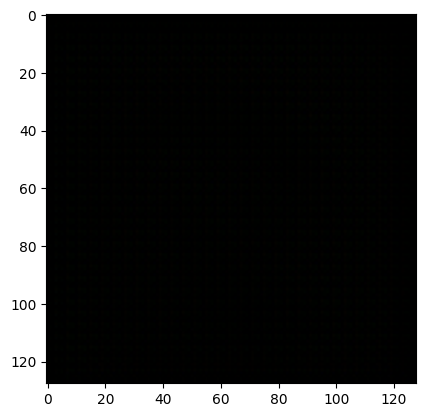

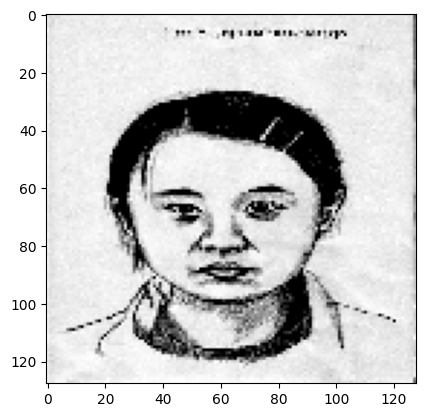

In [ ]:
import numpy
# Path to the test image (sketch)
test_path = '/content/gdrive/MyDrive/Dataset/test/test_sketch/f1-007-01-sz1.jpg'

# Load the test image and resize it to the required input size
test_image = load_img(test_path, target_size=(128, 128, 3))

# Convert the test image to array and normalize its values
test_image = img_to_array(test_image)
test_image = (test_image.astype(numpy.float32) - 127.5) / 127.5

# Create an array with shape (1, 128, 128, 3) containing the test image
zeros_array = numpy.zeros((1, 128, 128, 3))
zeros_array[0] = test_image.astype(numpy.float32)

# Generate a photo based on the test sketch using the generator model
result_photo = generator_model.predict(zeros_array)

import matplotlib.pyplot as pyplot

# Display the generated photo
pyplot.imshow(result_photo[0])
pyplot.show()

# Display the original test sketch
pyplot.imshow(test_image)
pyplot.show()


1/1 [==============================] - 0s 260ms/step


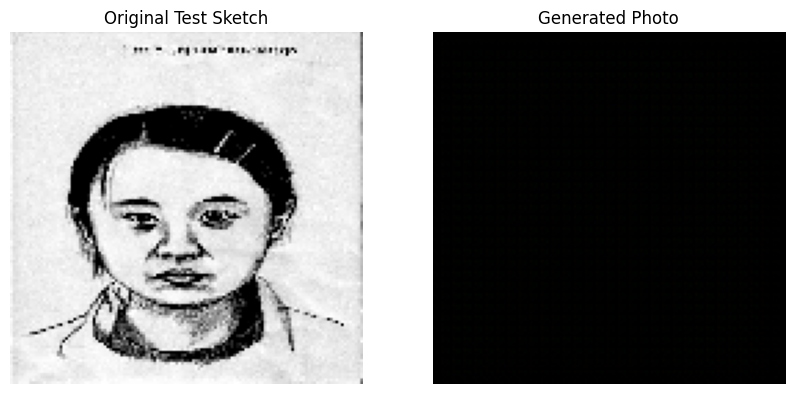

In [ ]:
#edited plotter
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Path to the test image (sketch)
test_path = '/content/gdrive/MyDrive/Dataset/test/test_sketch/f1-007-01-sz1.jpg'

# Load the test image and resize it to the required input size
test_image = load_img(test_path, target_size=(128, 128, 3))

# Convert the test image to array and normalize its values
test_image = img_to_array(test_image)
test_image = (test_image.astype(np.float32) - 127.5) / 127.5

# Create an array with shape (1, 128, 128, 3) containing the test image
zeros_array = np.zeros((1, 128, 128, 3))
zeros_array[0] = test_image.astype(np.float32)

# Generate a photo based on the test sketch using the generator model
result_photo = generator_model.predict(zeros_array)

# Plot the original test sketch and the generated photo side by side
plt.figure(figsize=(10, 5))

# Plot the original test sketch
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title('Original Test Sketch')
plt.axis('off')

# Plot the generated photo
plt.subplot(1, 2, 2)
plt.imshow(result_photo[0])
plt.title('Generated Photo')
plt.axis('off')

plt.show()



In [ ]:
import numpy as np

def calculate_average(numbers):
    return np.mean(numbers)

# Example array of numbers
numbers = [2.5, 3.7, 8.9, 1.2, 6.4]

average = calculate_average(numbers)
print("The average of the numbers is:", average)


In [ ]:
discriminator_loss

NameError: name 'discriminator_loss' is not defined

## When learing rate=0.0002 d_loss= 7.66 , g_loss=0.9

##When learning rate=0.0001 d_loss=4.7 , g_loss=0.66

#How to further imporve the Model

Changing type of optimizer

Changing batch size

decay rate

Making Changes in Architecture

Number of layers
